<a href="https://colab.research.google.com/github/hsym-uec/myWeb_github/blob/main/Simmple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SoftBank Stock data from Stooq.com
# reference https://seanmemo.com/234/

from pandas_datareader import data
start = '2023-04-01'
end = '2023-04-25'
#6501：日立製作所
df = data.DataReader('6501.JP', 'stooq', start, end)


In [2]:
df

Open  High   Low  Close   Volume
Date                                        
2023-04-25  7765  7799  7667   7717  2172400
2023-04-24  7804  7871  7774   7776  2609900
2023-04-21  7689  7777  7677   7728  3456600
2023-04-20  7695  7713  7622   7683  2014400
2023-04-19  7641  7689  7620   7652  2089100
2023-04-18  7550  7629  7528   7594  2890100
2023-04-17  7530  7563  7457   7500  2904600
2023-04-14  7377  7414  7324   7407  2777800
2023-04-13  7360  7365  7294   7305  2300300
2023-04-12  7320  7375  7300   7357  2595600
2023-04-11  7322  7345  7274   7300  2361900
2023-04-10  7264  7314  7239   7300  1913200
2023-04-07  7210  7249  7171   7198  2423400
2023-04-06  7033  7209  6992   7171  3978600
2023-04-05  7325  7325  7170   7176  3549000
2023-04-04  7370  7512  7361   7442  4217800
2023-04-03  7310  7366  7276   7359  2685900

<Axes: xlabel='Date'>

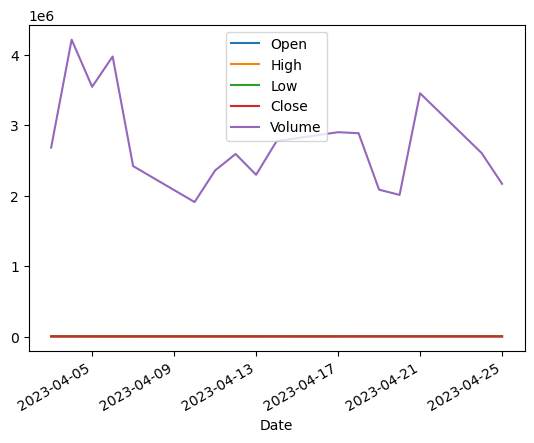

In [6]:
df.plot()


In [10]:
#https://dev.classmethod.jp/articles/pandas_datareader-mplfinance-tech/
#データのグラフ化

import mplfinance as mpf

df = df.sort_index()
mpf.plot(df, title='\nHitachi', type='candle', mav=(5, 25), volume=True, savefig='6501_JP.png')        

In [8]:
import talib as ta

df["upper"], df["middle"], df["lower"] = ta.BBANDS(df['Adj Close'], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

KeyError: 'Adj Close'

In [31]:
from pandas_datareader import data
import mplfinance as mpf

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
#数値を画面に出力するための関数
def draw_graph():
    #テキストボックスの内容を取得
    global number, start, end
    number2=str(number.get())
    start2 =str(start.get())
    end2   =str(end.get())
    filename = number2+'.png'
    #株式データの取得
    df = data.DataReader(number2, 'stooq', start2, end2)
    df = df.sort_index()
    #グラフの描画と保存
    mpf.plot(df, title='\n'+number2, type='candle', mav=(5, 25), volume=True, savefig=filename)
 
    #画像のサイズ取得
    img = Image.open(filename)
    width = img.width
    height = img.height
 
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title(number2)
    sub.geometry(str(width)+"x"+str(height))
    #グラフの描画
    graph = tk.PhotoImage(file=filename)
    canvas = tk.Canvas(sub,bg='white', width = width, height = height)
    canvas.place(x=0, y=0)
    canvas.create_image(0,0,image=graph, anchor=tk.NW)
    
# トップレベルウィンドウ作成
root = tk.Tk()

number_label = ttk.Label(
    root,
    text="num",
    width=5,
    relief=tk.SUNKEN,
)
number_label.grid(row=0, column=0, padx=20, pady=5)

start_label = ttk.Label(
    root,
    text="start",
    width=5,
    relief=tk.SUNKEN,
)
start_label.grid(row=1, column=0, padx=20, pady=5)

end_label = ttk.Label(
    root,
    text="end",
    width=5,
    relief=tk.SUNKEN,
)
end_label.grid(row=2, column=0, padx=20, pady=5)


number = tk.Entry(width=20)
number.grid(row=0, column=1, padx=10, pady=5)
start = tk.Entry(width=20)
start.grid(row=1, column=1, padx=10, pady=5)
end = tk.Entry(width=20)
end.grid(row=2, column=1, padx=10, pady=5)



draw = tk.StringVar(root)
draw.set("DRAW!")
draw_button = tk.Button(root, textvariable=draw, command=draw_graph)
draw_button.grid(row=3, column=1, padx=10, pady=5)


root.mainloop()

In [33]:
#コードと銘柄名のテーブルのダウンロード
import requests
url = "https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls"
r = requests.get(url)
with open('data_j.xls', 'wb') as output:
    output.write(r.content)

Empty DataFrame
Columns: [コード, 銘柄名, 33業種コード, 33業種区分, 規模コード, 規模区分]
Index: []

In [46]:
#コードと銘柄名のみを保存
import pandas as pd
stocklist = pd.read_excel("./data_j.xls")
stocklist = stocklist.loc[:,['コード', '銘柄名']]
stocklist.to_csv("stocklist.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.nikkei.com/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

articles = soup.find_all('a', class_='k-card__title')
for article in articles:
    print(article.text.strip())

In [13]:
import dash
import dash_core_components as dcc
from dash import html
import plotly.express as px
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import pandas_datareader as pdr

import seaborn as sns

sns.set(font=['Yu Gothic'])
# データ読み込み
df_pf = pd.read_csv('portfolio.csv', encoding='shift_jis', index_col=0)
df_pf

EmptyDataError: No columns to parse from file

In [12]:
import pandas
csvfile_path = './stocklist.csv'
df = pandas.read_csv(csvfile_path)
print(df)


      Unnamed: 0   コード                                   銘柄名
0              0  1301                                    極洋
1              1  1305                         ダイワ上場投信－トピックス
2              2  1306               ＮＥＸＴ　ＦＵＮＤＳ　ＴＯＰＩＸ連動型上場投信
3              3  1308                     上場インデックスファンドＴＯＰＩＸ
4              4  1309  ＮＥＸＴ　ＦＵＮＤＳ　ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信
...          ...   ...                                   ...
4248        4248  9993                                  ヤマザワ
4249        4249  9994                                   やまや
4250        4250  9995                                 グローセル
4251        4251  9996                                 サトー商会
4252        4252  9997                                  ベルーナ

[4253 rows x 3 columns]


In [16]:
df_part = df[df['銘柄名'].str.contains('日立')]
print(df_part)
print(df_part['コード'].astype(str))
print(df_part['銘柄名'].astype(str))

      Unnamed: 0   コード    銘柄名
2445        2445  6305   日立建機
2573        2573  6501  日立製作所
2859        2859  7004   日立造船
2445    6305
2573    6501
2859    7004
Name: コード, dtype: object
2445     日立建機
2573    日立製作所
2859     日立造船
Name: 銘柄名, dtype: object


In [30]:
from pandas_datareader import data
import mplfinance as mpf

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
csvfile_path = './stocklist.csv'
df = pandas.read_csv(csvfile_path)

#数値を画面に出力するための関数
def search_table():
    global name, df
    name2=str(name.get())
    df_part = df[df['銘柄名'].str.contains(name2)]
    df_part_str=df_part.astype(str)
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title("search")
    sub.geometry("500x500")
    #グラフの描画
    search_label = ttk.Label(
        sub,
        text=df_part_str,
        width=50,
        relief=tk.SUNKEN,
    )
    search_label.grid(row=0, column=0, padx=20, pady=5)
    
    

# トップレベルウィンドウ作成
root2 = tk.Toplevel()
root2.title("search")
root2.geometry("300x200")

name_label = ttk.Label(
    root2,
    text="name",
    width=5,
    relief=tk.SUNKEN,
)
name_label.grid(row=0, column=0, padx=20, pady=5)

name = tk.Entry(root2,width=20)
name.grid(row=0, column=1, padx=10, pady=5)

get = tk.StringVar(root2)
get.set("GET!")
get_button = tk.Button(root2, textvariable=get, command=search_table)
get_button.grid(row=3, column=1, padx=10, pady=5)

root2.mainloop()

In [14]:
from pandas_datareader import data
import mplfinance as mpf
import pandas

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
#数値を画面に出力するための関数
csvfile_path = './stocklist.csv'
df = pandas.read_csv(csvfile_path)

def draw_graph():
    #テキストボックスの内容を取得
    global number, start, end
    number2=str(number.get())+".JP"
    start2 =str(start.get())
    end2   =str(end.get())
    filename = number2+'.png'
    #株式データの取得
    df = data.DataReader(number2, 'stooq', start2, end2)
    df = df.sort_index()
    #グラフの描画と保存
    mpf.plot(df, title='\n'+number2, type='candle', mav=(5, 25), volume=True, savefig=filename)
 
    #画像のサイズ取得
    img = Image.open(filename)
    width = img.width
    height = img.height
 
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title(number2)
    sub.geometry(str(width)+"x"+str(height))
    #グラフの描画
    graph = tk.PhotoImage(file=filename)
    canvas = tk.Canvas(sub,bg='white', width = width, height = height)
    canvas.place(x=0, y=0)
    canvas.create_image(0,0,image=graph, anchor=tk.NW)

#数値を画面に出力するための関数
def search_table():
    global name, df
    name2=str(name.get())
    df_part = df[df['銘柄名'].str.contains(name2)]
    df_part_str=df_part.astype(str)
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title("search")
    sub.geometry("500x500")
    #グラフの描画
    search_label = ttk.Label(
        sub,
        text=df_part_str,
        width=50,
        relief=tk.SUNKEN,
    )
    search_label.grid(row=0, column=0, padx=20, pady=5)

# トップレベルウィンドウ作成
root = tk.Tk()


name_label = ttk.Label(
    root,
    text="name",
    width=5,
    relief=tk.SUNKEN,
)
name_label.grid(row=0, column=0, padx=20, pady=5)

name = tk.Entry(root,width=20)
name.grid(row=0, column=1, padx=10, pady=5)

get = tk.StringVar(root)
get.set("GET!")
get_button = tk.Button(root, textvariable=get, command=search_table)
get_button.grid(row=0, column=3, padx=10, pady=5)
    

number_label = ttk.Label(
    root,
    text="num",
    width=5,
    relief=tk.SUNKEN,
)
number_label.grid(row=1, column=0, padx=20, pady=5)

start_label = ttk.Label(
    root,
    text="start",
    width=5,
    relief=tk.SUNKEN,
)
start_label.grid(row=2, column=0, padx=20, pady=5)

end_label = ttk.Label(
    root,
    text="end",
    width=5,
    relief=tk.SUNKEN,
)
end_label.grid(row=3, column=0, padx=20, pady=5)


number = tk.Entry(width=20)
number.grid(row=1, column=1, padx=10, pady=5)
start = tk.Entry(width=20)
start.grid(row=2, column=1, padx=10, pady=5)
end = tk.Entry(width=20)
end.grid(row=3, column=1, padx=10, pady=5)



draw = tk.StringVar(root)
draw.set("DRAW!")
draw_button = tk.Button(root, textvariable=draw, command=draw_graph)
draw_button.grid(row=4, column=1, padx=10, pady=5)

root.mainloop()

            Open  High   Low  Close   Volume
Date                                        
2023-05-16  7970  8077  7949   8077  2812600
2023-05-15  7880  7970  7841   7970  2049500
2023-05-12  7877  7885  7811   7848  2149800
2023-05-11  7796  7825  7762   7814  1595400
2023-05-10  7885  7890  7746   7803  2307400
2023-05-09  7879  7946  7861   7897  3487300
2023-05-08  7885  7900  7799   7812  2987900
2023-05-02  7800  7825  7706   7735  2437500
2023-05-01  7597  7780  7591   7780  3636600
2023-04-28  7380  7504  7286   7485  6828700
2023-04-27  7500  7649  7496   7646  3153800
2023-04-26  7596  7618  7510   7586  3488800
2023-04-25  7765  7799  7667   7717  2172400
2023-04-24  7804  7871  7774   7776  2609900
2023-04-21  7689  7777  7677   7728  3456600
2023-04-20  7695  7713  7622   7683  2014400
2023-04-19  7641  7689  7620   7652  2089100
2023-04-18  7550  7629  7528   7594  2890100
2023-04-17  7530  7563  7457   7500  2904600
2023-04-14  7377  7414  7324   7407  2777800
2023-04-13

<Axes: xlabel='Date'>

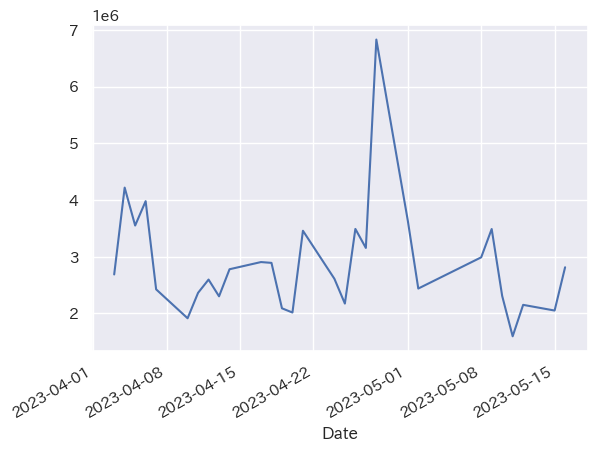

In [33]:
# SoftBank Stock data from Stooq.com
# reference https://seanmemo.com/234/
import datetime
dt = datetime.datetime.today()
from pandas_datareader import data
start = '2023-04-01'
end = dt.date()
#6501：日立製作所
df = data.DataReader('6501.JP', 'stooq', start, end)
print(df)
df['Volume'].plot()

In [36]:
import pandas as pd

import datetime
import pandas_datareader.data as web

In [38]:
df_data_j = pd.read_excel("./data/data_j.xls")

In [2]:
from pandas_datareader import data
import pandas as pd 
import numpy as np
# 株価データを取得
df = data.DataReader('7203.JP', 'stooq')
# 日付の古い順に並び替え
df.sort_index(inplace=True)

In [3]:
df

Open     High      Low    Close    Volume
Date                                                    
2018-05-23  1418.99  1421.99  1394.95  1396.45  35274040
2018-05-24  1384.43  1385.93  1350.43  1353.81  45589715
2018-05-25  1344.42  1351.93  1334.65  1336.35  32380315
2018-05-28  1336.35  1340.67  1317.56  1324.51  27340415
2018-05-29  1318.69  1323.76  1310.24  1310.24  27952170
...             ...      ...      ...      ...       ...
2023-05-15  1939.50  1942.00  1926.00  1933.00  16791400
2023-05-16  1933.00  1939.50  1919.00  1923.50  18728200
2023-05-17  1925.00  1935.50  1921.00  1928.00  16295600
2023-05-18  1945.00  1958.00  1942.00  1955.50  28317600
2023-05-19  1963.50  1973.50  1950.50  1959.50  23600700

[1216 rows x 5 columns]

In [4]:
df["SMA5"] = df["Close"].rolling(window=5).mean()
df["SMA25"] = df["Close"].rolling(window=25).mean()

df.head(10)

Open     High      Low    Close     Volume      SMA5  SMA25
Date                                                                      
2018-05-23  1418.99  1421.99  1394.95  1396.45   35274040       NaN    NaN
2018-05-24  1384.43  1385.93  1350.43  1353.81   45589715       NaN    NaN
2018-05-25  1344.42  1351.93  1334.65  1336.35   32380315       NaN    NaN
2018-05-28  1336.35  1340.67  1317.56  1324.51   27340415       NaN    NaN
2018-05-29  1318.69  1323.76  1310.24  1310.24   27952170  1344.272    NaN
2018-05-30  1287.70  1293.33  1281.88  1284.88   47156635  1321.958    NaN
2018-05-31  1299.72  1313.62  1298.40  1299.91  183562665  1311.178    NaN
2018-06-01  1305.36  1345.93  1303.67  1337.66   68831540  1311.440    NaN
2018-06-04  1352.12  1391.75  1350.81  1390.06   54920950  1324.550    NaN
2018-06-05  1390.06  1391.38  1375.22  1379.55   40046140  1338.412    NaN

In [7]:
from pandas_datareader import data
import pandas as pd 
import numpy as np
import datetime as dt
import mplfinance as mpf
start = '2023-01-01'
now = dt.datetime.now()
end = now.strftime('%Y-%m-%d')
# 株価データを取得
df = data.DataReader('9432.JP', 'stooq', start, end)
# 日付の古い順に並び替え
df.sort_index(inplace=True)

In [8]:
df

Open  High   Low  Close   Volume
Date                                        
2023-01-04  3762  3795  3761   3762  5988900
2023-01-05  3785  3807  3744   3763  6020600
2023-01-06  3763  3773  3740   3741  5755400
2023-01-10  3725  3762  3696   3696  8955400
2023-01-11  3710  3742  3707   3727  4654200
...          ...   ...   ...    ...      ...
2023-05-17  4169  4190  4146   4167  7217900
2023-05-18  4175  4193  4151   4155  6524400
2023-05-19  4150  4153  4112   4124  5459000
2023-05-22  4100  4207  4095   4204  6228500
2023-05-23  4217  4225  4135   4168  7952600

[94 rows x 5 columns]

In [11]:
# MACD計算

exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp12 - exp26

# シグナル計算

df['Signal'] = df['MACD'].rolling(window=9).mean()
# ヒストグラム(MACD - シグナル)
df['Hist'] = df['MACD'] - df['Signal']
# MACDとシグナルのプロット作成

add_plot = [mpf.make_addplot(df['MACD'], color='m', panel=1, secondary_y=False),
            mpf.make_addplot(df['Signal'], color='c', panel=1, secondary_y=False),
            mpf.make_addplot(df['Hist'], type='bar', color='g', panel=1, secondary_y=True)]

# チャート表示

mpf.plot(df, title='\nNTT(9432)', type='candle', mav=(5, 25), volume=True, addplot=add_plot, volume_panel=2, savefig='9432_JP_MACD.png')

In [12]:
#一目均衡表 9、26、52日間のMAX、MIN値の計算

max_9 = df['High'].rolling(window=9, min_periods=1).max()
min_9 = df['Low'].rolling(window=9, min_periods=1).min()

max_26 = df['High'].rolling(window=26, min_periods=1).max()
min_26 = df['Low'].rolling(window=26, min_periods=1).min()

max_52 = df['High'].rolling(window=52).max()
min_52 = df['Low'].rolling(window=52).min()

# ５本線の計算

df['tenkan'] = (max_9 + min_9)/2
df['base'] = (max_26 + min_26)/2
df['senkou1'] = ((df['tenkan'] + df['base'])/2).iloc[:-26]
df['senkou2'] = ((max_52 + min_52)/2).iloc[:-26]
df['chikou'] = df['Close'].iloc[:-26]

# 一目均衡表のプロット作成

add_plot = [mpf.make_addplot(df['base'], color='black'),
            mpf.make_addplot(df['tenkan'], color='red'),
            mpf.make_addplot(df['chikou'], color='darkorange')
        ]

# チャート表示

mpf.plot(df, title='\nNTT(9432)', type='candle', mav=(5, 25), volume=True, addplot=add_plot, returnfig=True, fill_between=dict(y1=df['senkou1'].values, y2=df['senkou2'].values, alpha=0.5, color='gray'), volume_panel=1, savefig='9432_JP_一目均衡表.png')

(<Figure size 800x575 with 4 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='Volume  $10^{6}$'>,
  <Axes: >])

In [13]:
#RSI(相対力指数)
# 終値の差分

df_diff = df['Close'].diff()

# 値上がり幅と値下がり幅

df_up, df_down = df_diff.copy(), df_diff.copy()
df_up[df_up < 0] = 0
df_down[df_down > 0] = 0
df_down = df_down * -1

# 14日間の単純移動平均

sim14_up = df_up.rolling(window=14).mean()
sim14_down = df_down.rolling(window=14).mean()

# RSI

df['RSI'] = sim14_up / (sim14_up + sim14_down) * 100

# MACDとRSIのプロット作成

add_plot = [mpf.make_addplot(df['MACD'], color='m', panel=1, secondary_y=False),
            mpf.make_addplot(df['Signal'], color='c', panel=1, secondary_y=False),
            mpf.make_addplot(df['Hist'], type='bar', color='g', panel=1, secondary_y=True),
            mpf.make_addplot(df['RSI'], panel=2)]

# チャート表示

mpf.plot(df, title='\nNTT(9432)', type='candle', mav=(5, 25), volume=True, addplot=add_plot, volume_panel=3, savefig='9432_JP_RSI.png')

In [15]:
import tkinter
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox
import os
from tkcalendar import Calendar, DateEntry
import pandas as pd
import datetime


# 出力処理
def click_exe_button():
    start = calender_date.get_date()
    end = calender_date2.get_date().split("/")
    log.insert(END, '開始日'+ str(start) + '\n')
    log.insert(END, '終了日'+'20'+end[2]+'-'+end[0]+'-'+end[1]+'\n')
    dt = datetime.datetime.now()  # UTC
    str_dt = dt.strftime('%Y/%m/%d %H:%M:%S')
    log.insert(END, '処理完了' + str_dt + '\n')


if __name__ == '__main__':
    # ウィンドウを作成
    root = tkinter.Tk()
    root.title("アプリテスト") # アプリの名前
    root.geometry("480x500") # アプリの画面サイズ

    # Frame2の作成
    frame2 = ttk.Frame(root, padding=10)
    frame2.grid()
    
    # 日付選択ボタン
    
    start = StringVar()
    start.set('開始日')
    start_label = ttk.Label(frame2, textvariable=start)
    start_label.grid(row=0, column=0)
    calender_date =DateEntry(frame2)
    calender_date.grid(row=1, column=0)
    
    end = StringVar()
    end.set('終了日')
    end_label = ttk.Label(frame2, textvariable=end)
    end_label.grid(row=0, column=2)
    calender_date2 = Calendar(frame2, date_patternstr="y-mm-dd")
    calender_date2.grid(row=1, column=2)
    
    # Frame3の作成
    frame3 = ttk.Frame(root, padding=10)
    frame3.grid()
    
    # 処理ボタンの作成
    export_button = ttk.Button(frame3, text='日付確認', command=click_exe_button, width=20)
    export_button.grid(row=0, column=1)
    
    # Frame4の作成
    frame4 = ttk.Frame(root, padding=10)
    frame4.grid()
    
    # ログ表示BOX
    log = Text(frame4,width=50, height=12,borderwidth=5,wrap='none') 
    log.grid(row=1, column=1) 
    
    # ウィンドウを動かす
    root.mainloop()

ModuleNotFoundError: No module named 'tkcalendar'

In [2]:
import tkinter
from tkcalendar import Calendar, DateEntry

class TestTkcalender(tkinter.Frame):

    def __init__(self,master):
        super().__init__(master)
        self.pack()
        self.master.title("tkカレンダーテスト")
        self.master.geometry("800x600")

        self.data_entry_date = DateEntry()
        self.data_entry_date.place(x=250, y=230)

        self.calender_date = Calendar()
        self.calender_date.place(x=500, y=230)

def main():
    root = tkinter.Tk()
    root = TestTkcalender(master=root)
    root.mainloop()

if __name__ == "__main__":
    main()

In [5]:
import tkinter
from tkinter import ttk
from tkcalendar import Calendar, DateEntry

class TestTkcalender(tkinter.Frame):

    def __init__(self,master):
        super().__init__(master)
        self.pack()
        self.master.title("tkカレンダーテスト")
        self.master.geometry("800x600")

        # カレンダーのスタイル
        style = ttk.Style()
        style.theme_use('clam')
        style.configure('my.DateEntry',
                        fieldbackground='light green',
                        background='dark green',
                        foreground='dark orange',
                        arrowcolor='white')

        self.data_entry_date = DateEntry(style='my.DateEntry',date_pattern='yyyy-MM-dd')
        self.data_entry_date.place(x=250, y=230)

        self.calender_date = Calendar()
        self.calender_date.place(x=500, y=230)

        self.print_button = tkinter.Button(master, text="プリント", bg="coral", font=("Times New Roman", 20), command=self.click_print)
        self.print_button.place(x=400, y=150, width=150, height=50)

    def click_print(self):
        date_data = self.calender_date.get_date()
        date_data.split("/")
        print(self.data_entry_date.get_date())
        #print(self.calender_date.get_date())
        print(date_data[2]+"-"+date_data[0]+"-"+date_data[1])

def main():
    root = tkinter.Tk()
    root = TestTkcalender(master=root)
    root.mainloop()

if __name__ == "__main__":
    main()

2023-05-30
1-/-5
2023-05-30
1-/-5
2023-05-30
2-/-6
